Text(0, 0.5, 'Signal')

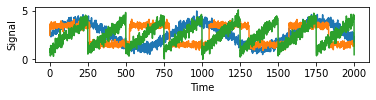

In [2]:
import mglearn
import matplotlib.pyplot as plt
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [ ]:
'''
1. We cannot observer the original signal but ony an additive mixture of all three
2. We want to recover the decomposition of the mixed signal into the original components.
'''

In [4]:
import numpy as np
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements: ", format(X.shape))

Shape of measurements:  (2000, 100)


In [5]:
#Using nmf to recover the three signals
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered Signal Shape: ", format(S_.shape))

C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


Recovered Signal Shape:  (2000, 3)


C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [8]:
#Applying PCA for comparison of results
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("Recovered Signal Shape: ", format(H.shape))

Recovered Signal Shape:  (2000, 3)


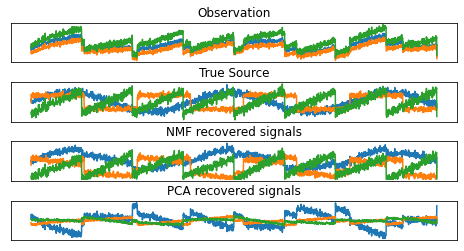

In [9]:
models = [X, S, S_, H]
names = ["Observation", "True Source", "NMF recovered signals", "PCA recovered signals"]
fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (),'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3], '-')

In [ ]:
'''
1. THe figure above includes 3 of the 100 measurements from the mixed mesurement X
2. NMF can be seen doing a resonable good job of discovering the original signal.
3. While PCA, failed and used the first component to explain majority of the variation in the data.
4. it is worth to note the components produced by NMF have no natural order do the ordering in the above example is an accidental.
'''